In [1]:
import matplotlib.pylab as plt
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import copy
from distribuciones import diagonal, paralelo
from random import sample
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = datasets.load_iris()

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
def entrenar_red(evaluaciones,red,x_train,y_train,x_val,y_val,x_test,y_test):
    errores = []
    min_error = 1
    
    for i in range(evaluaciones):
        red.fit(x_train,y_train)
        y_pred = red.predict(x_val)
        error_val = sk.metrics.zero_one_loss(y_pred, y_val)
        #errores.append(error_valid)
        if error_val < min_error:
            min_error = error_val
            mejor_red = copy.deepcopy(red)
            
    pred_test = mejor_red.predict(x_test)
    error_test = sk.metrics.zero_one_loss(pred_test,y_test)

    pred_train = mejor_red.predict(x_train)
    error_train = sk.metrics.zero_one_loss(pred_train,y_train)

    
    return red, error_train, min_error, error_test

In [5]:
neuronas = 20
pmom = 0.1
lrate = .005
epocas = [10,30,60,90]

In [6]:
%%time

errores_train = []
errores_valid = []
errores_test = []

redes = []

for nepocas in epocas:
    
    print(nepocas)
    clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=nepocas) 
    
    red, error_train, error_val, error_test = entrenar_red(evaluaciones = 1000, red = clasif, 
                                                       x_train = x_train,y_train = y_train,
                                                       x_val = x_val,y_val = y_val,
                                                       x_test = x_test,y_test = y_test)
    
    errores_train.append(error_train)
    errores_valid.append(error_val)
    errores_test.append(error_test)
    redes.append(red)

10
30
60
90
CPU times: user 1min 23s, sys: 72.2 ms, total: 1min 23s
Wall time: 1min 23s


Text(0.5, 0, 'epocas')

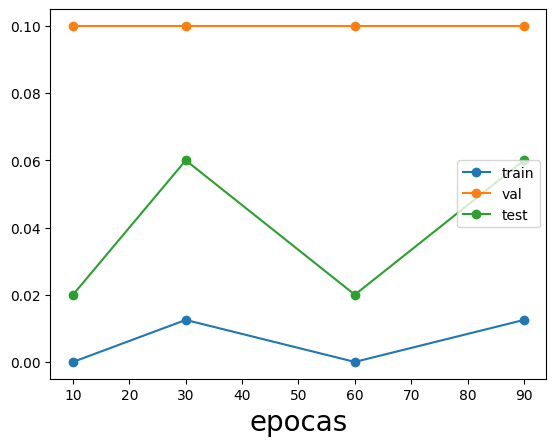

In [7]:
plt.plot(epocas,errores_train,label='train',marker='o')
plt.plot(epocas,errores_valid,label='val',marker='o')
plt.plot(epocas,errores_test,label='test',marker='o')
plt.legend()
plt.xlabel('epocas',size=20)

In [23]:
errores_valid

[0.0, 0.0, 0.0, 0.0]